<a href="https://colab.research.google.com/github/Jessicasarahkoshy/Study-of-ml-algorithms/blob/main/LogisticRegression_beforeoversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression model accuracy (in %): 93.81837042625423
[0]
Specificity: 0.9994472361809045
precision 90.6724836326861
recall  (in %): 93.81837042625423
f1 (in %): 90.9130260004176
Sensitivity: 0.0061162079510703364


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


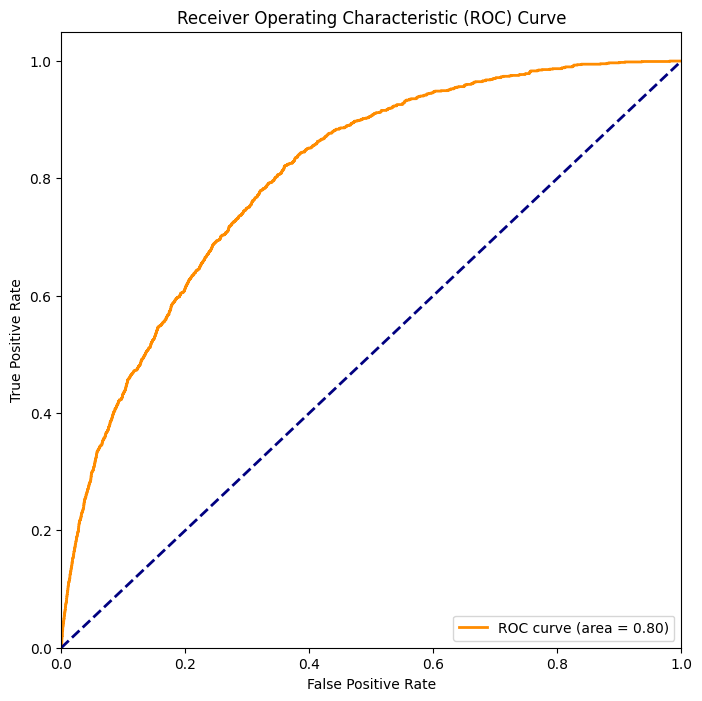

AUC (Area Under the Curve): 0.80


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import pandas
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# load the dataset
df = pandas.read_csv(r"/content/diabetes_data.csv")
features = ['Age', 'Sex', 'HighChol', 'CholCheck','BMI','Smoker','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','HighBP','Diabetes']
X = df[features]
y = df['Stroke']
# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.3,
                                       random_state=23)
# LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)
predicted = clf.predict([[11,1,0,1,30,1,0,1,0,0,0,2,2,11,1,1,0]])
print(predicted)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
pre=precision_score(y_test,y_pred,average="weighted")
print("precision",pre*100)
print("recall  (in %):", rec*100)
print("f1 (in %):", f1*100)
sensitivity = tp / (tp+fn)
print("Sensitivity:", sensitivity)
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC (Area Under the Curve): {:.2f}".format(roc_auc))